# Group 10 - Project 1

# Members: Bryan Groves, Randy Lam, Zach Wood, Marti Reisinger

# Topic: Drivers in revenue for top 1000 movies

## Overview: We intend to utilize a dataset from Kaggle that outlines the top 1000 movies by their ranking. We intend to analyze the studio, runtime, and performance by date  from both revenue and number of movies that fall within these categories.

In [1]:
# Import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
#Load CSV
movie_df = pd.read_csv("Resources/movies.csv")

movie_df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [3]:

cleaned = movie_df.dropna(how = "any")

cleaned



,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13
...,...,...,...,...,...,...,...,...,...,...,...
911,911,While You Were Sleeping (1995),A hopelessly romantic Chicago Transit Authorit...,Walt Disney Studios Motion Pictures,"April 21, 1995",81057016,101000000,182057016,"['Comedy', 'Drama', 'Romance']",1 hr 43 min,PG
913,913,The Notebook (2004),A poor yet passionate young man falls in love ...,New Line Cinema,"June 25, 2004",81001787,36813370,117815157,"['Drama', 'Romance']",2 hr 3 min,PG-13
915,915,Eat Pray Love (2010),A married woman realizes how unhappy her marri...,Sony Pictures Entertainment (SPE),"August 13, 2010",80574010,124020006,204594016,"['Biography', 'Drama', 'Romance']",2 hr 13 min,PG-13
916,916,The Texas Chainsaw Massacre (2003),After picking up a traumatized young hitchhike...,New Line Cinema,"October 17, 2003",80571655,26792250,107363905,"['Crime', 'Horror']",1 hr 38 min,R


# Analysis

#### We would like to see how much revenue each studio is generating in total by creating stacked bar chart with revenue by studio

In [ ]:
#Bryan Visual 1
studio_group_sum = movie_df.groupby('Distributor').sum()

studio_group_sum.head()

#### Per studio, what is their average revenue for movies that fall within the top 1000 list

In [ ]:
average_revenue = studio_group_sum / studio_group_count

average_revenue

#### Is there a better time of year for movie successes? We would like to look at the top 1000 movies and understand if summer blockbusters (June-Aug) fair better than holiday movies (Nov-Jan)

In [ ]:
#Randy Visual 1 

#### We would like to measure the total revenue by year for movies that are in the top 1000 list

In [ ]:
#Randy Visual 2

#### Create chart based on revenue by market

In [ ]:
#Marti Visual 1

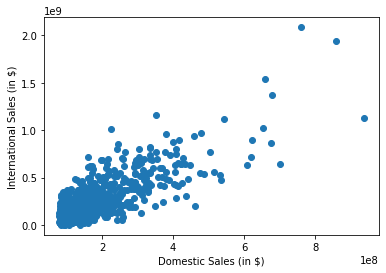

In [43]:

x = movie_df['Domestic Sales (in $)'] 
y = movie_df["International Sales (in $)"]
plt.scatter(x , y)
plt.xlabel("Domestic Sales (in $)")
plt.ylabel("International Sales (in $)")
plt.show()


The r-squared is: 0.6359452890843889
y = 1.67x + -49652684.53


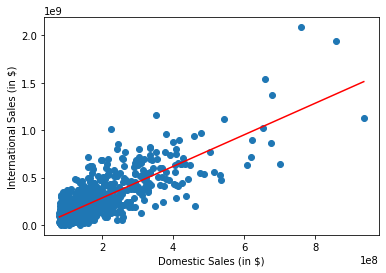

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Domestic Sales (in $)")
plt.ylabel("International Sales (in $)")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()


#### Provide analysis of total counts and revenue by rating

In [ ]:
#Marti Visual 2

In [4]:
G_data = cleaned.loc[cleaned["License"]=='G']
G_data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
24,24,Toy Story 4 (2019),"When a new toy called ""Forky"" joins Woody and ...",Walt Disney Studios Motion Pictures,"June 20, 2019",434038008,639356585,1073394593,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 40 min,G
28,28,The Lion King (1994),Lion prince Simba and his father are targeted ...,Walt Disney Studios Motion Pictures,"June 15, 1994",422783777,640828028,1063611805,"['Adventure', 'Animation', 'Drama', 'Family', ...",1 hr 28 min,G
100,100,"Monsters, Inc. (2001)","In order to power the city, monsters have to s...",Walt Disney Studios Motion Pictures,"November 2, 2001",290642256,289065482,579707738,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 32 min,G
203,203,Ratatouille (2007),A rat who can cook makes an unusual alliance w...,Walt Disney Studios Motion Pictures,"June 28, 2007",206445654,417280431,623726085,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 51 min,G
229,229,Cars 2 (2011),Star race car Lightning McQueen and his pal Ma...,Walt Disney Studios Motion Pictures,"June 22, 2011",191452396,368400000,559852396,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 46 min,G


In [5]:
PG_data = cleaned.loc[cleaned["License"]=='PG']
PG_data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
11,11,The Lion King (2019),"After the murder of his father, a young lion p...",Walt Disney Studios Motion Pictures,"July 11, 2019",543638043,1119261396,1662899439,"['Adventure', 'Animation', 'Drama', 'Family', ...",1 hr 58 min,PG
15,15,Beauty and the Beast (2017),A selfish Prince is cursed to become a monster...,Walt Disney Studios Motion Pictures,"March 16, 2017",504481165,769095055,1273576220,"['Adventure', 'Family', 'Fantasy', 'Musical', ...",2 hr 9 min,PG
17,17,Frozen II (2019),"Anna, Elsa, Kristoff, Olaf and Sven leave Aren...",Walt Disney Studios Motion Pictures,"November 20, 2019",477373578,972653355,1450026933,"['Adventure', 'Animation', 'Comedy', 'Family',...",1 hr 43 min,PG
18,18,Star Wars: Episode I - The Phantom Menace (1999),Two Jedi escape a hostile blockade to find all...,Twentieth Century Fox,"May 19, 1999",474544677,552538030,1027082707,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 16 min,PG
19,19,Star Wars: Episode IV - A New Hope (1977),Luke Skywalker joins forces with a Jedi Knight...,Twentieth Century Fox,"May 25, 1977",460998507,195751992,775398007,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 1 min,PG


In [6]:
PG13_data = cleaned.loc[cleaned["License"]=='PG-13']
PG13_data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13
7,7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13


In [7]:
R_data = cleaned.loc[cleaned["License"]=='R']
R_data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
47,47,The Passion of the Christ (2004),Depicts the final twelve hours in the life of ...,Newmarket Films,"February 25, 2004",370782930,241271576,612054506,['Drama'],2 hr 7 min,R
51,51,Deadpool (2016),A wisecracking mercenary gets experimented on ...,Twentieth Century Fox,"February 9, 2016",363070709,419766082,782836791,"['Action', 'Adventure', 'Comedy', 'Sci-Fi']",1 hr 48 min,R
56,56,American Sniper (2014),Navy S.E.A.L. sniper Chris Kyle's pinpoint acc...,Warner Bros.,"December 25, 2014",350126372,197300000,547426372,"['Action', 'Biography', 'Drama', 'War']",2 hr 13 min,R
62,62,Joker (2019),"In Gotham City, mentally troubled comedian Art...",Warner Bros.,"October 2, 2019",335451311,738968073,1074419384,"['Crime', 'Drama', 'Thriller']",2 hr 2 min,R
69,69,It (2017),"In the summer of 1989, a group of bullied kids...",Warner Bros.,"September 6, 2017",328828874,372967570,701796444,['Horror'],2 hr 15 min,R


In [8]:
G_data["Title"].nunique()

14

In [9]:
PG_data["Title"].nunique()


173

In [10]:
PG13_data["Title"].nunique()

363

In [11]:
R_data["Title"].nunique()

194

In [13]:
G = 14
PG = 173
PG13 = 363
R = 194

In [14]:
license_df = pd.DataFrame({
    "G Rating":G,
    "PG Rating":PG,
    "PG-13 Rating":PG13,
    "R Rating":R,}, index=[0])


In [15]:
license_df[["G Rating","PG Rating","PG-13 Rating","R Rating"]]
license_df

,G Rating,PG Rating,PG-13 Rating,R Rating
0,14,173,363,194


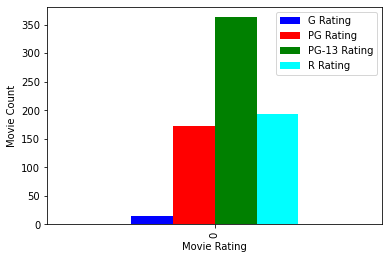

In [42]:
License_Chart = license_df.plot.bar(color=['blue', 'red', 'green', 'cyan'], align= "center")

plt.ylabel("Movie Count")
plt.xlabel("Movie Rating")

plt.show()



# Hypothesis Test

#### We believe that shorter movies will gross more revenue than longer movies that were listed in the top 1000. Our intent is to find the midpoint of run time and understand the revenue associated with those groups. Plotting the times initially to understand the distribution of movies by runtime

In [ ]:
#Zach Hyptothesis